In [2]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import scipy.constants as cst
from lammpsrun import LAMMPS, Prism
import os, sys, shutil

from ase import Atoms
from ase.visualize import view
from ase.io.trajectory import Trajectory
from ase.io import write, read
from ase.build import molecule
from ase.spacegroup import crystal
from ase.data import atomic_numbers, atomic_names, atomic_masses, covalent_radii

import pandas as pd

# homepath = "G:\\home\\LAMMPS_Simulation\\"
# hpc_path = "G:\\home\\LAMMPS_Simulation\\HPC_Jupyter\\"
# ephemeral_path = "G:\\ephemeral\\"
ephemeral_path = "/local/yiming/Desktop/yx6015/ephemeral/"
print(homepath + '\n' + hpc_path)

G:\home\LAMMPS_Simulation\
G:\home\LAMMPS_Simulation\HPC_Jupyter\


In [5]:
aq_out = ['2479808.cx1', '2479809.cx1', '2479810.cx1']
aq_names = ['Aq_efield_0MVcm', 'Aq_efield_30MVcm', 'Aq_efield_60MVcm']

In [6]:
traj_lists = []

for name, outdir in zip(aq_names, aq_out):
    traj_lists.append(Trajectory(os.path.join(ephemeral_path, outdir, name+".traj"), 'r'))

In [7]:
log_dfs = []
log_reader = LAMMPS()
for outdir in aq_out:
    log_path = os.path.join(ephemeral_path, outdir, "log.lammps")
    log_reader.read_lammps_log(log_path)
    traj_df = pd.DataFrame(log_reader.thermo_content)
    traj_df.set_index('step', inplace=True)
    log_dfs.append(traj_df)

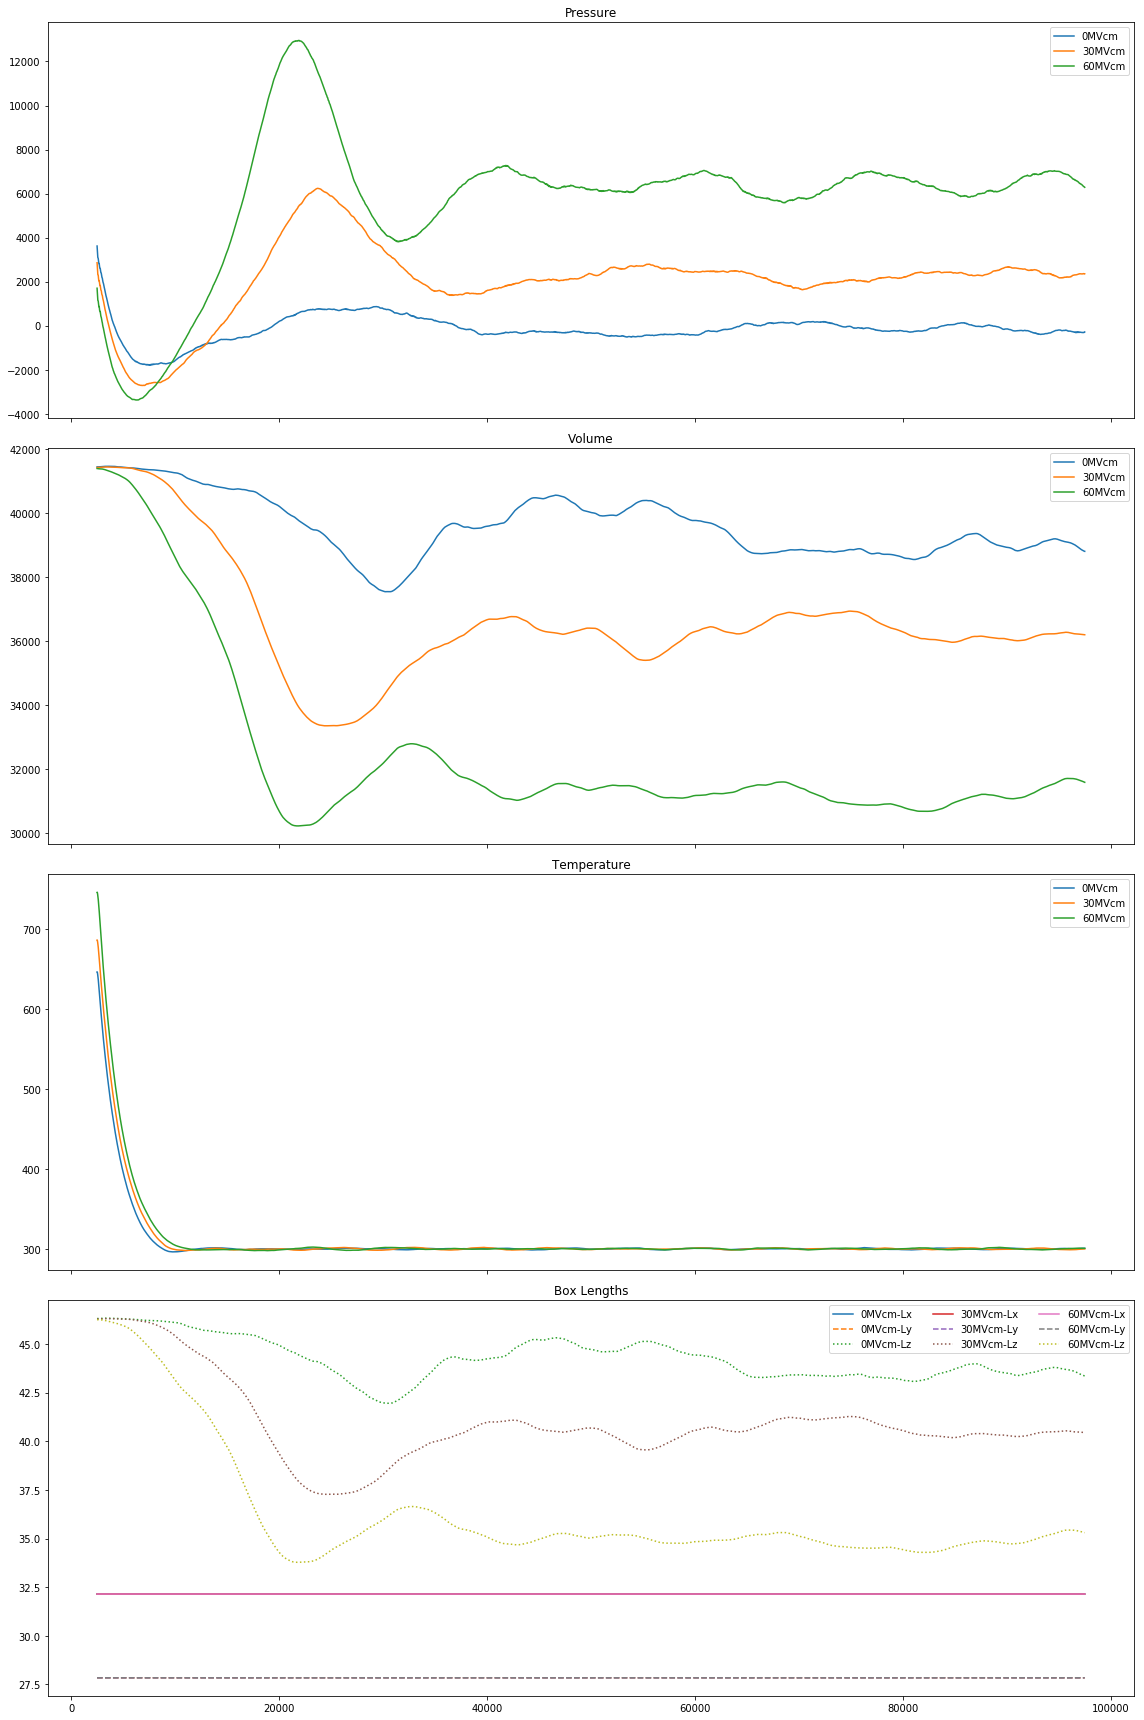

In [9]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(16, 24))
ax1.set_title('Pressure')
ax2.set_title('Volume')
ax3.set_title('Temperature')
ax4.set_title('Box Lengths')

for df, name in zip(log_dfs, ['0MVcm', '30MVcm', '60MVcm']):
    ax1.plot(df.press.rolling(5000, center=True).mean(), label = name)
    ax2.plot(df.vol.rolling(5000, center=True).mean(), label = name)
    ax3.plot(df.temp.rolling(5000, center=True).mean(), label = name)
    
    ax4.plot(df.lx.rolling(5000, center=True).mean(), label = name+'-Lx', ls = '-')
    ax4.plot(df.ly.rolling(5000, center=True).mean(), label = name+'-Ly', ls = '--')
    ax4.plot(df.lz.rolling(5000, center=True).mean(), label = name+'-Lz', ls = ':')
    
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend(ncol=3)
f.tight_layout()
plt.show()